In [22]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import finplot as fplt
import matplotlib.pyplot as plt
import datetime

from ta.trend import ADXIndicator

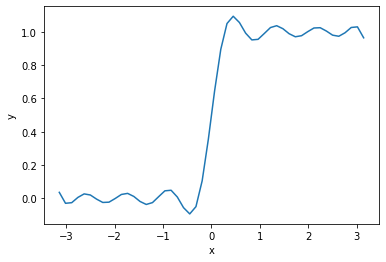

In [48]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import matplotlib.pyplot as plt

def fourier_series(x, f, n):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                     for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

x, y = variables('x, y')
w, = parameters('w')
model_dict = {y: fourier_series(x, f=w, n=7)}
# print(model_dict)

# Make step function data
xdata = np.linspace(-np.pi, np.pi)
# xdata = xdata+xdata
ydata = np.zeros_like(xdata)
ydata[xdata > 0] = 1
# Define a Fit object for this model and data
fit = Fit(model_dict, x=xdata, y=ydata)
fit_result = fit.execute()
# print(fit_result)

# Plot the result
# plt.plot(xdata, ydata)
plt.plot(xdata, fit.model(x=xdata, **fit_result.params).y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
yg = fit.model(x=xdata, **fit_result.params).y


In [49]:
yg = fit.model(x=xdata, **fit_result.params).y

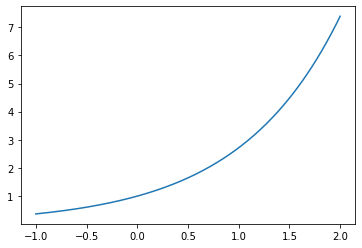

In [38]:
yg=yg.tolist()
yy=yg+yg+yg+yg+yg
yy=np.array(yy)
x1 = np.linspace(-1, 2,len(yy))
y1 = np.exp(x1)
plt.plot(x1,y1)

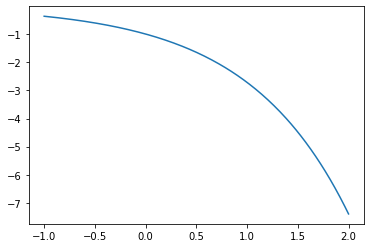

In [50]:
yg=yg.tolist()
yy=yg+yg+yg+yg+yg
yy=np.array(yy)
x1 = np.linspace(-1, 2,len(yy))
y1 = -np.exp(x1)
plt.plot(x1,y1)

In [57]:
# x1 = np.linspace(-1, 2,len(yy))
# y1 = np.exp(x1)
# plt.plot(x1,y1)

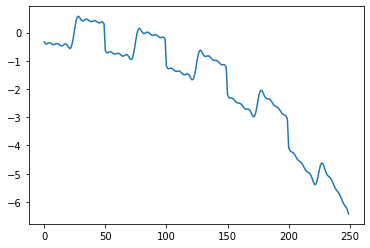

In [51]:
plt.plot(range(0,len(yy)),yy+y1)

In [52]:
df = pd.DataFrame(data=yy+y1,columns=['Close'])

In [53]:
#indicator
df['EWMA-5'] = df['Close'].ewm(span=5).mean()
df['EWMA-12'] = df['Close'].ewm(span=12).mean()
df['EWMA-26'] = df['Close'].ewm(span=26).mean()
df['MACD'] = df['EWMA-12'] - df['EWMA-26']
df['SIGNAL LINE'] = df['MACD'].ewm(span=9).mean()

#RSI
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        
    up_chg = 0 * diff
    down_chg = 0 * diff
    up_chg[diff > 0] = diff[ diff>0 ]
    down_chg[diff < 0] = diff[ diff < 0 ]
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi
df['RSI-7'] = computeRSI(df['Close'],3)
df['RSI-14'] = computeRSI(df['Close'], 14)

low_min  = df['Close'].rolling( window = 9 ).min()
high_max = df['Close'].rolling( window = 9 ).max()
df['%K'] = (100*(df['Close']-low_min)/(high_max-low_min))
df['%D']=df['%K'].ewm(span=5).mean() 

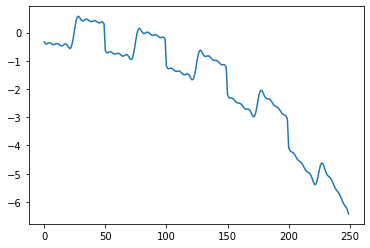

In [55]:
df['Close'].plot()

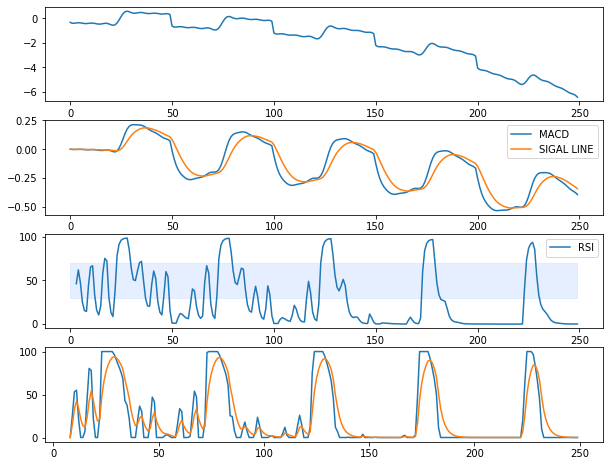

In [56]:
fig, ax = plt.subplots(4,figsize=(10,8))
ax[0].plot(df['Close'])

ax[1].plot(df[['MACD','SIGNAL LINE']])
ax[1].legend(['MACD','SIGAL LINE'])

ax[2].plot(df[['RSI-7']])
ax[2].legend(['RSI'])
ax[2].fill_between(df.index, y1=30, y2=70, color='#adccff', alpha='0.3')

ax[3].plot(df[['%K','%D']])